In [1]:
from skimage import data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean

In [5]:
from osgeo import gdal

In [6]:
top_fn = '/att/nobackup/jli30/data/water_map/ETOPO1_Ice_c.tif'
ds = gdal.Open(top_fn)
top = ds.GetRasterBand(1).ReadAsArray()
top.shape

(10800, 21600)

In [7]:
mod_fn = '/att/nobackup/jli30/data/water_map/MODIS_static_500m_7Class.tif'
ds = gdal.Open(mod_fn)
mod = ds.GetRasterBand(1).ReadAsArray()
mod.shape

(43200, 86400)

In [10]:
xs, xe, ys, ye = 26280, 27000, 9480, 10680

In [11]:
xss, xes, yss, yes = 6570, 6750, 2370, 2670

In [12]:
top_s = top[yss:yes, xss:xes]
mod_s = mod[ys:ye, xs:xe]

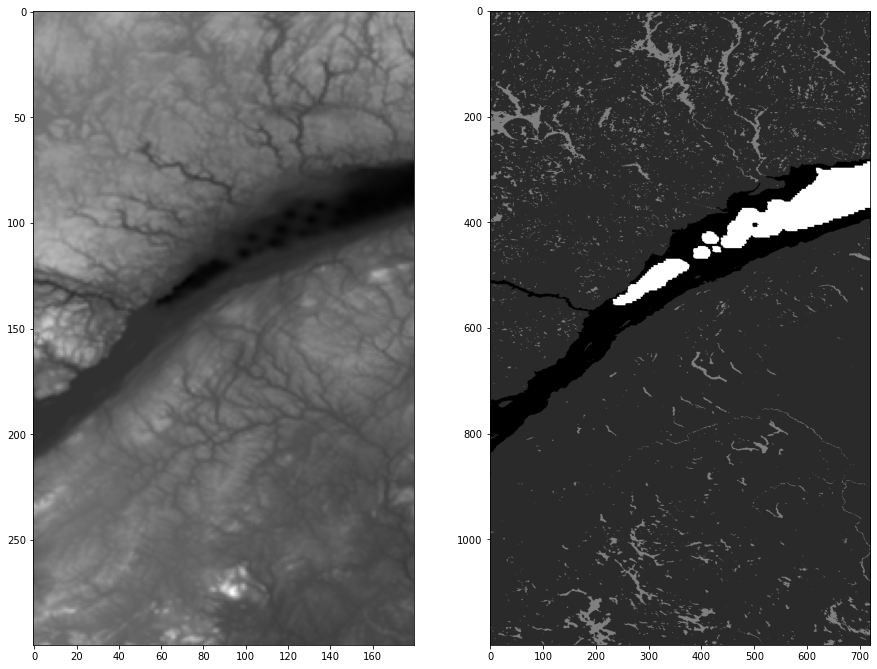

In [15]:
fig, axes=plt.subplots(1,2, figsize=(15,30))
ax=axes.ravel()
ax[0].imshow(top_s, cmap='gray')
ax[1].imshow(mod_s, cmap='gray')

In [18]:
mod_mask = np.where(mod_s==1, 0, 1)

The order of interpolation. The order has to be in the range 0-5:
0: Nearest-neighbor

1: Bi-linear (default)

2: Bi-quadratic

3: Bi-cubic

4: Bi-quartic

5: Bi-quintic

In [16]:
methods = {0: 'Nearest-neighbor',

1: 'Bi-linear',

2: 'Bi-quadratic',

3: 'Bi-cubic',

4: 'Bi-quartic',

5: 'Bi-quintic',}
methods[0]

'Nearest-neighbor'

/att/nobackup/jli30/conda/envs/watermap/lib/python3.7/site-packages/skimage/transform/_warps.py:178: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  preserve_range=preserve_range)


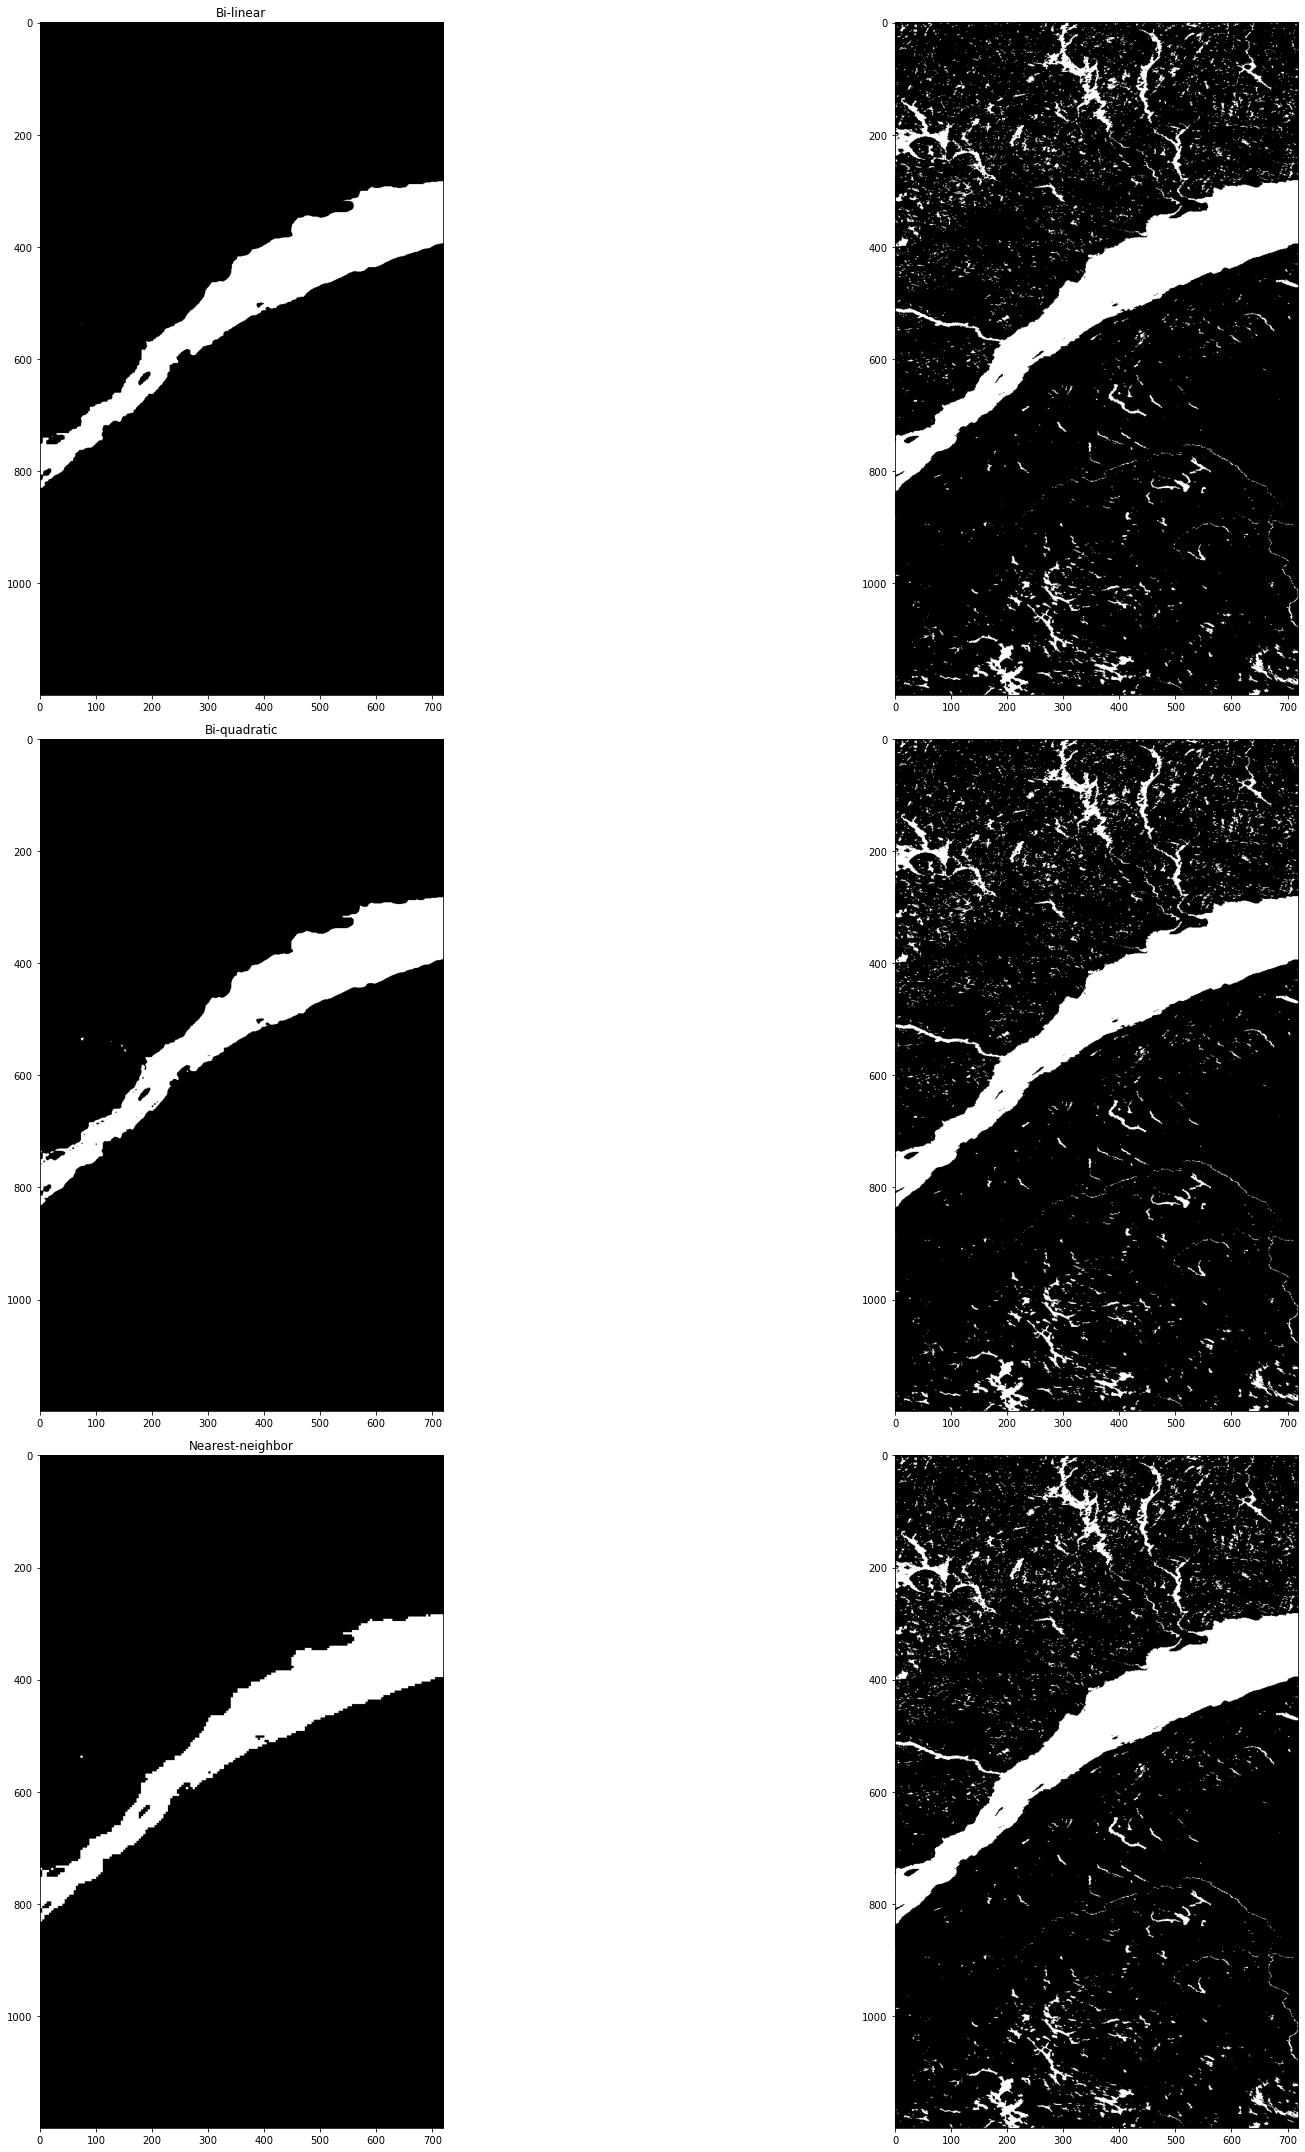

In [19]:
fig, axes=plt.subplots(3,2, figsize=(30,30))
ax=axes.ravel()
for order in [0, 1,2]:
    top_res = rescale(top_s, 4, anti_aliasing=False, order=order)
    top_mask = np.where(top_res>0, 0, 1)
    
    ind=int((order-1)*2)
    ax[ind].imshow(top_mask, cmap='gray')
    ax[ind+1].imshow(mod_mask, cmap='gray')
    ax[ind].set_title(methods[order])
plt.tight_layout()

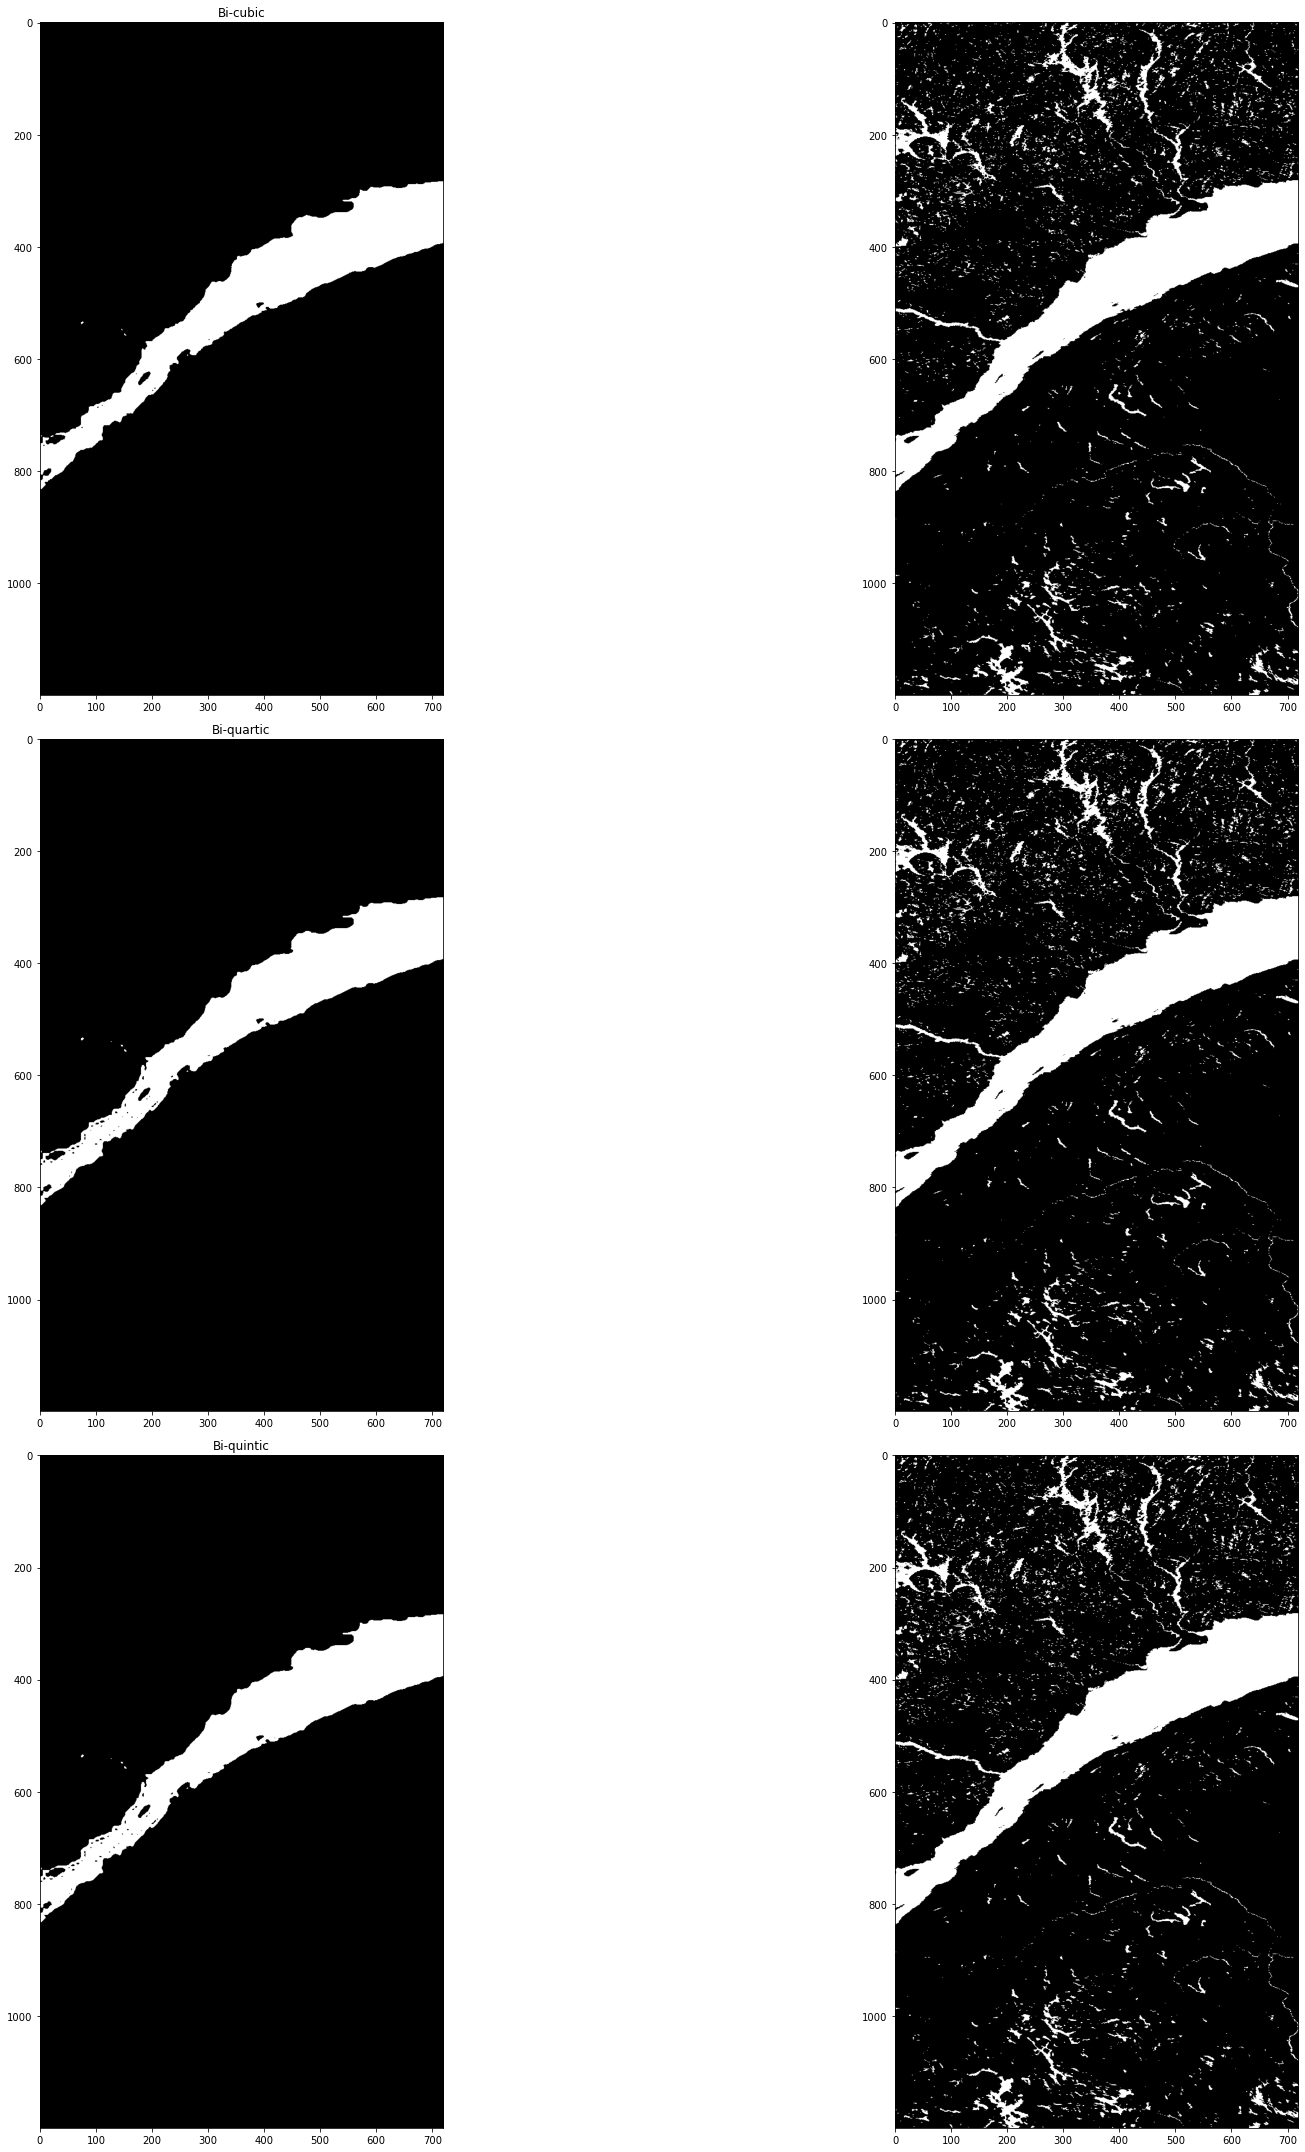

In [20]:
fig, axes=plt.subplots(3,2, figsize=(30,30))
ax=axes.ravel()
for order in [3,4,5]:
    top_res = rescale(top_s, 4, anti_aliasing=False, order=order)
    top_mask = np.where(top_res>0, 0, 1)
    
    ind=int((order-3)*2)
    ax[ind].imshow(top_mask, cmap='gray')
    ax[ind+1].imshow(mod_mask, cmap='gray')
    ax[ind].set_title(methods[order])
plt.tight_layout()